In [1]:
!pip install roboflow
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=e649cab71dc5d254c91d620d597b2455c52228d8e84d81fbee4760990f514720
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.4/609.4 kB 6.8 MB/s eta 0:00:00


In [2]:
import cv2
from google.colab.patches import cv2_imshow

from ultralytics import YOLO

In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="###########", model_format='yolov8')
project = rf.workspace("yolo-vuyol").project("animal_detection-j86fk")
dataset = project.version(1).download(location='/content/my-datasets')

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/my-datasets in yolov8:: 100%|██████████| 628/628 [00:00<00:00, 874.10it/s]


In [10]:
model = YOLO('yolov8n.pt')

model.train(data='/content/my-datasets/data.yaml', epochs=20)

Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/my-datasets/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=F

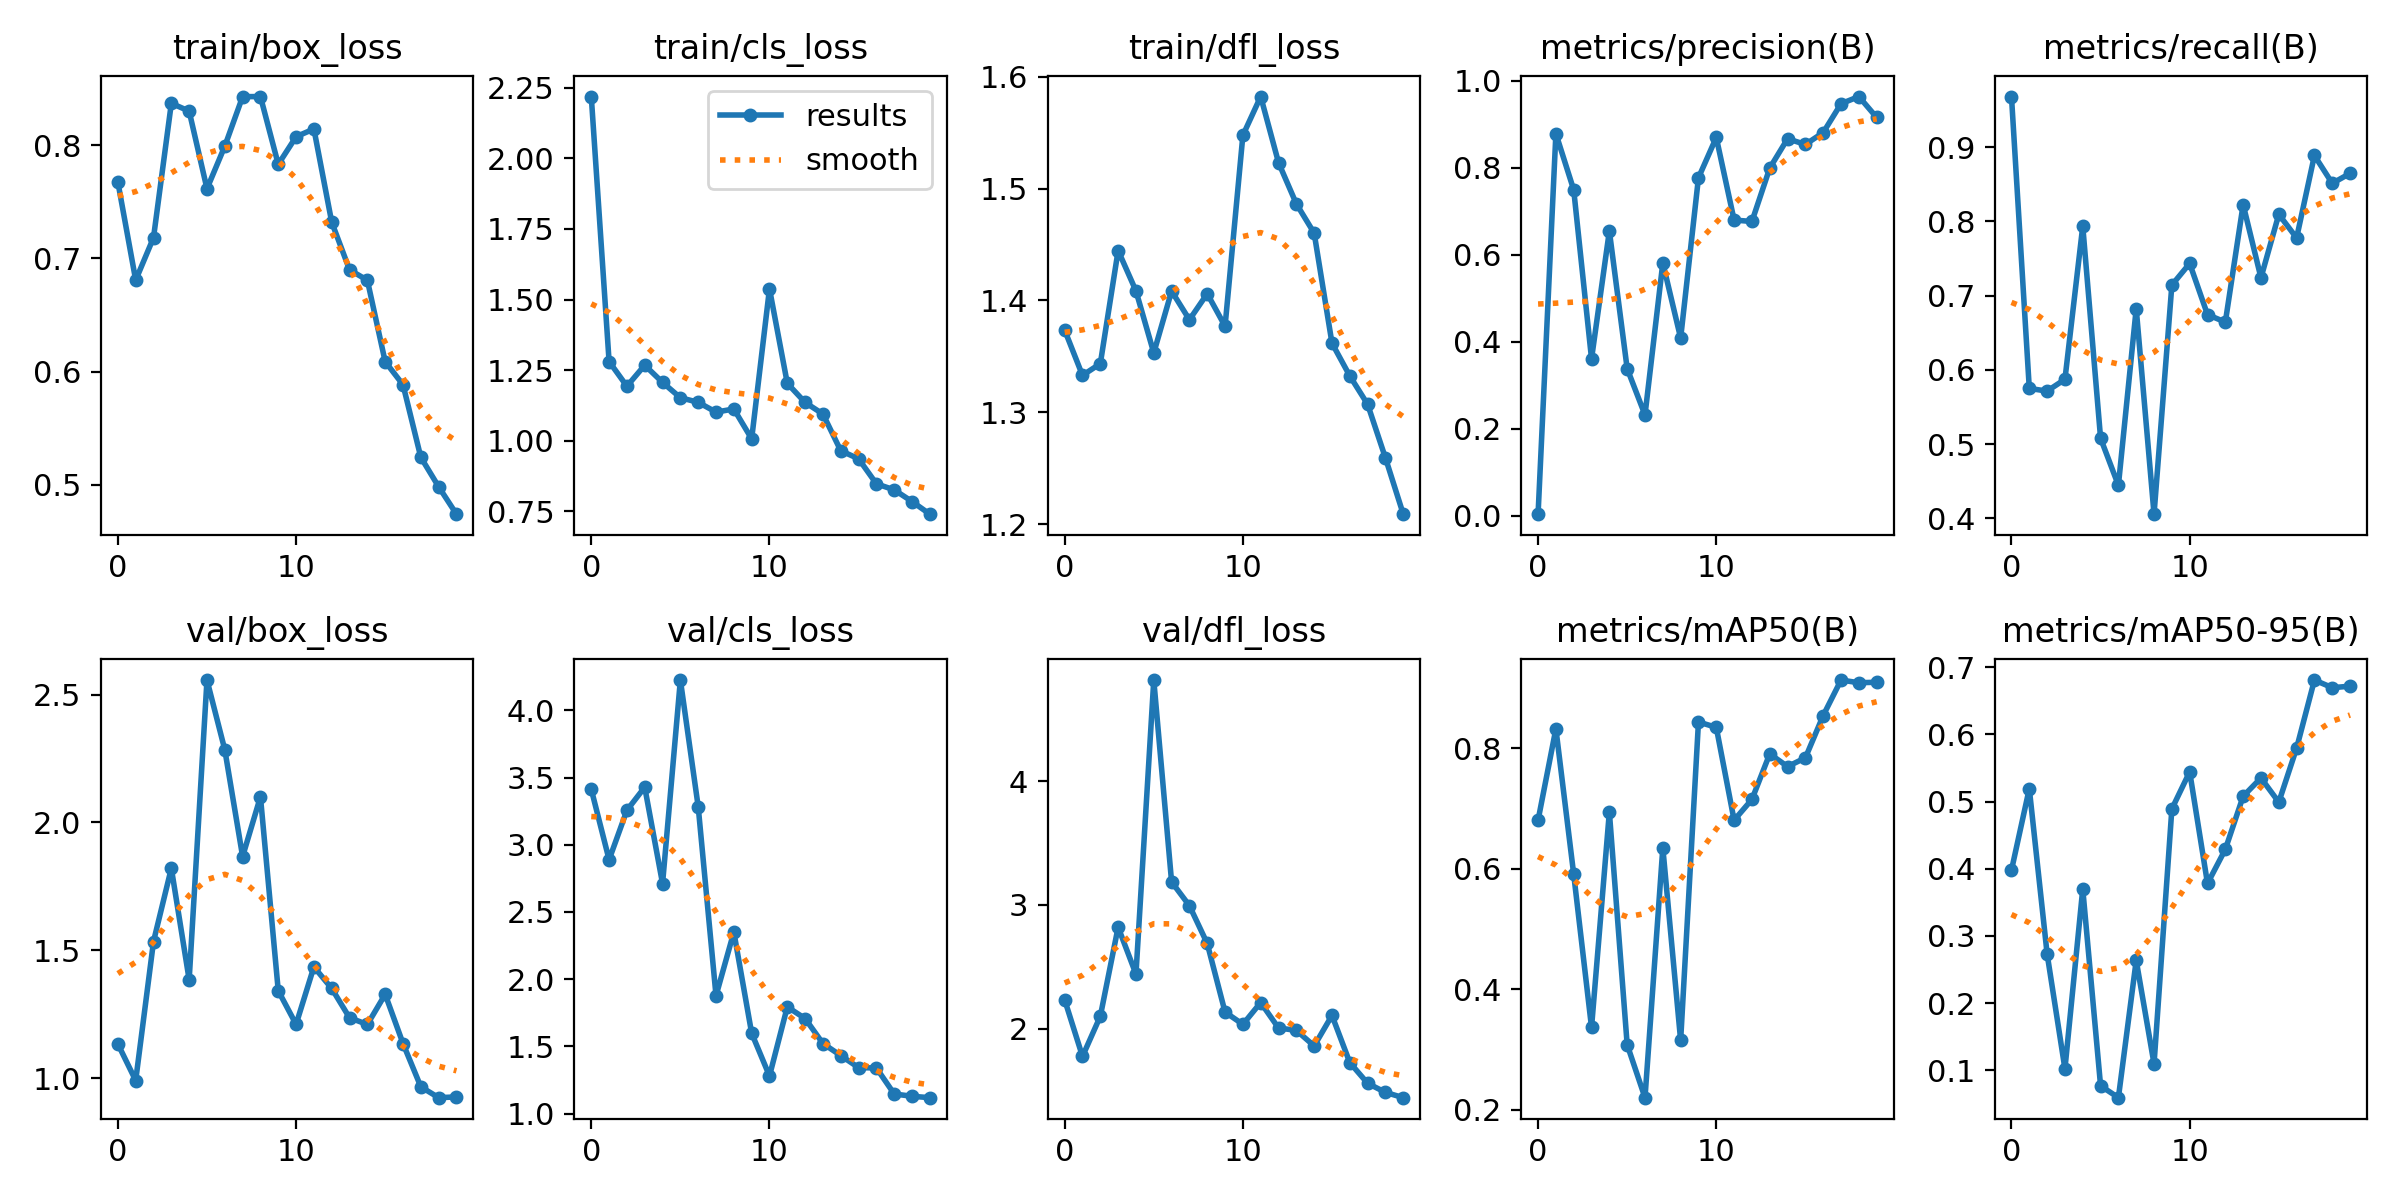

In [11]:
import cv2
from google.colab.patches import cv2_imshow

confusion_matrix = cv2.imread('/content/runs/detect/train2/results.png')

cv2_imshow(confusion_matrix)

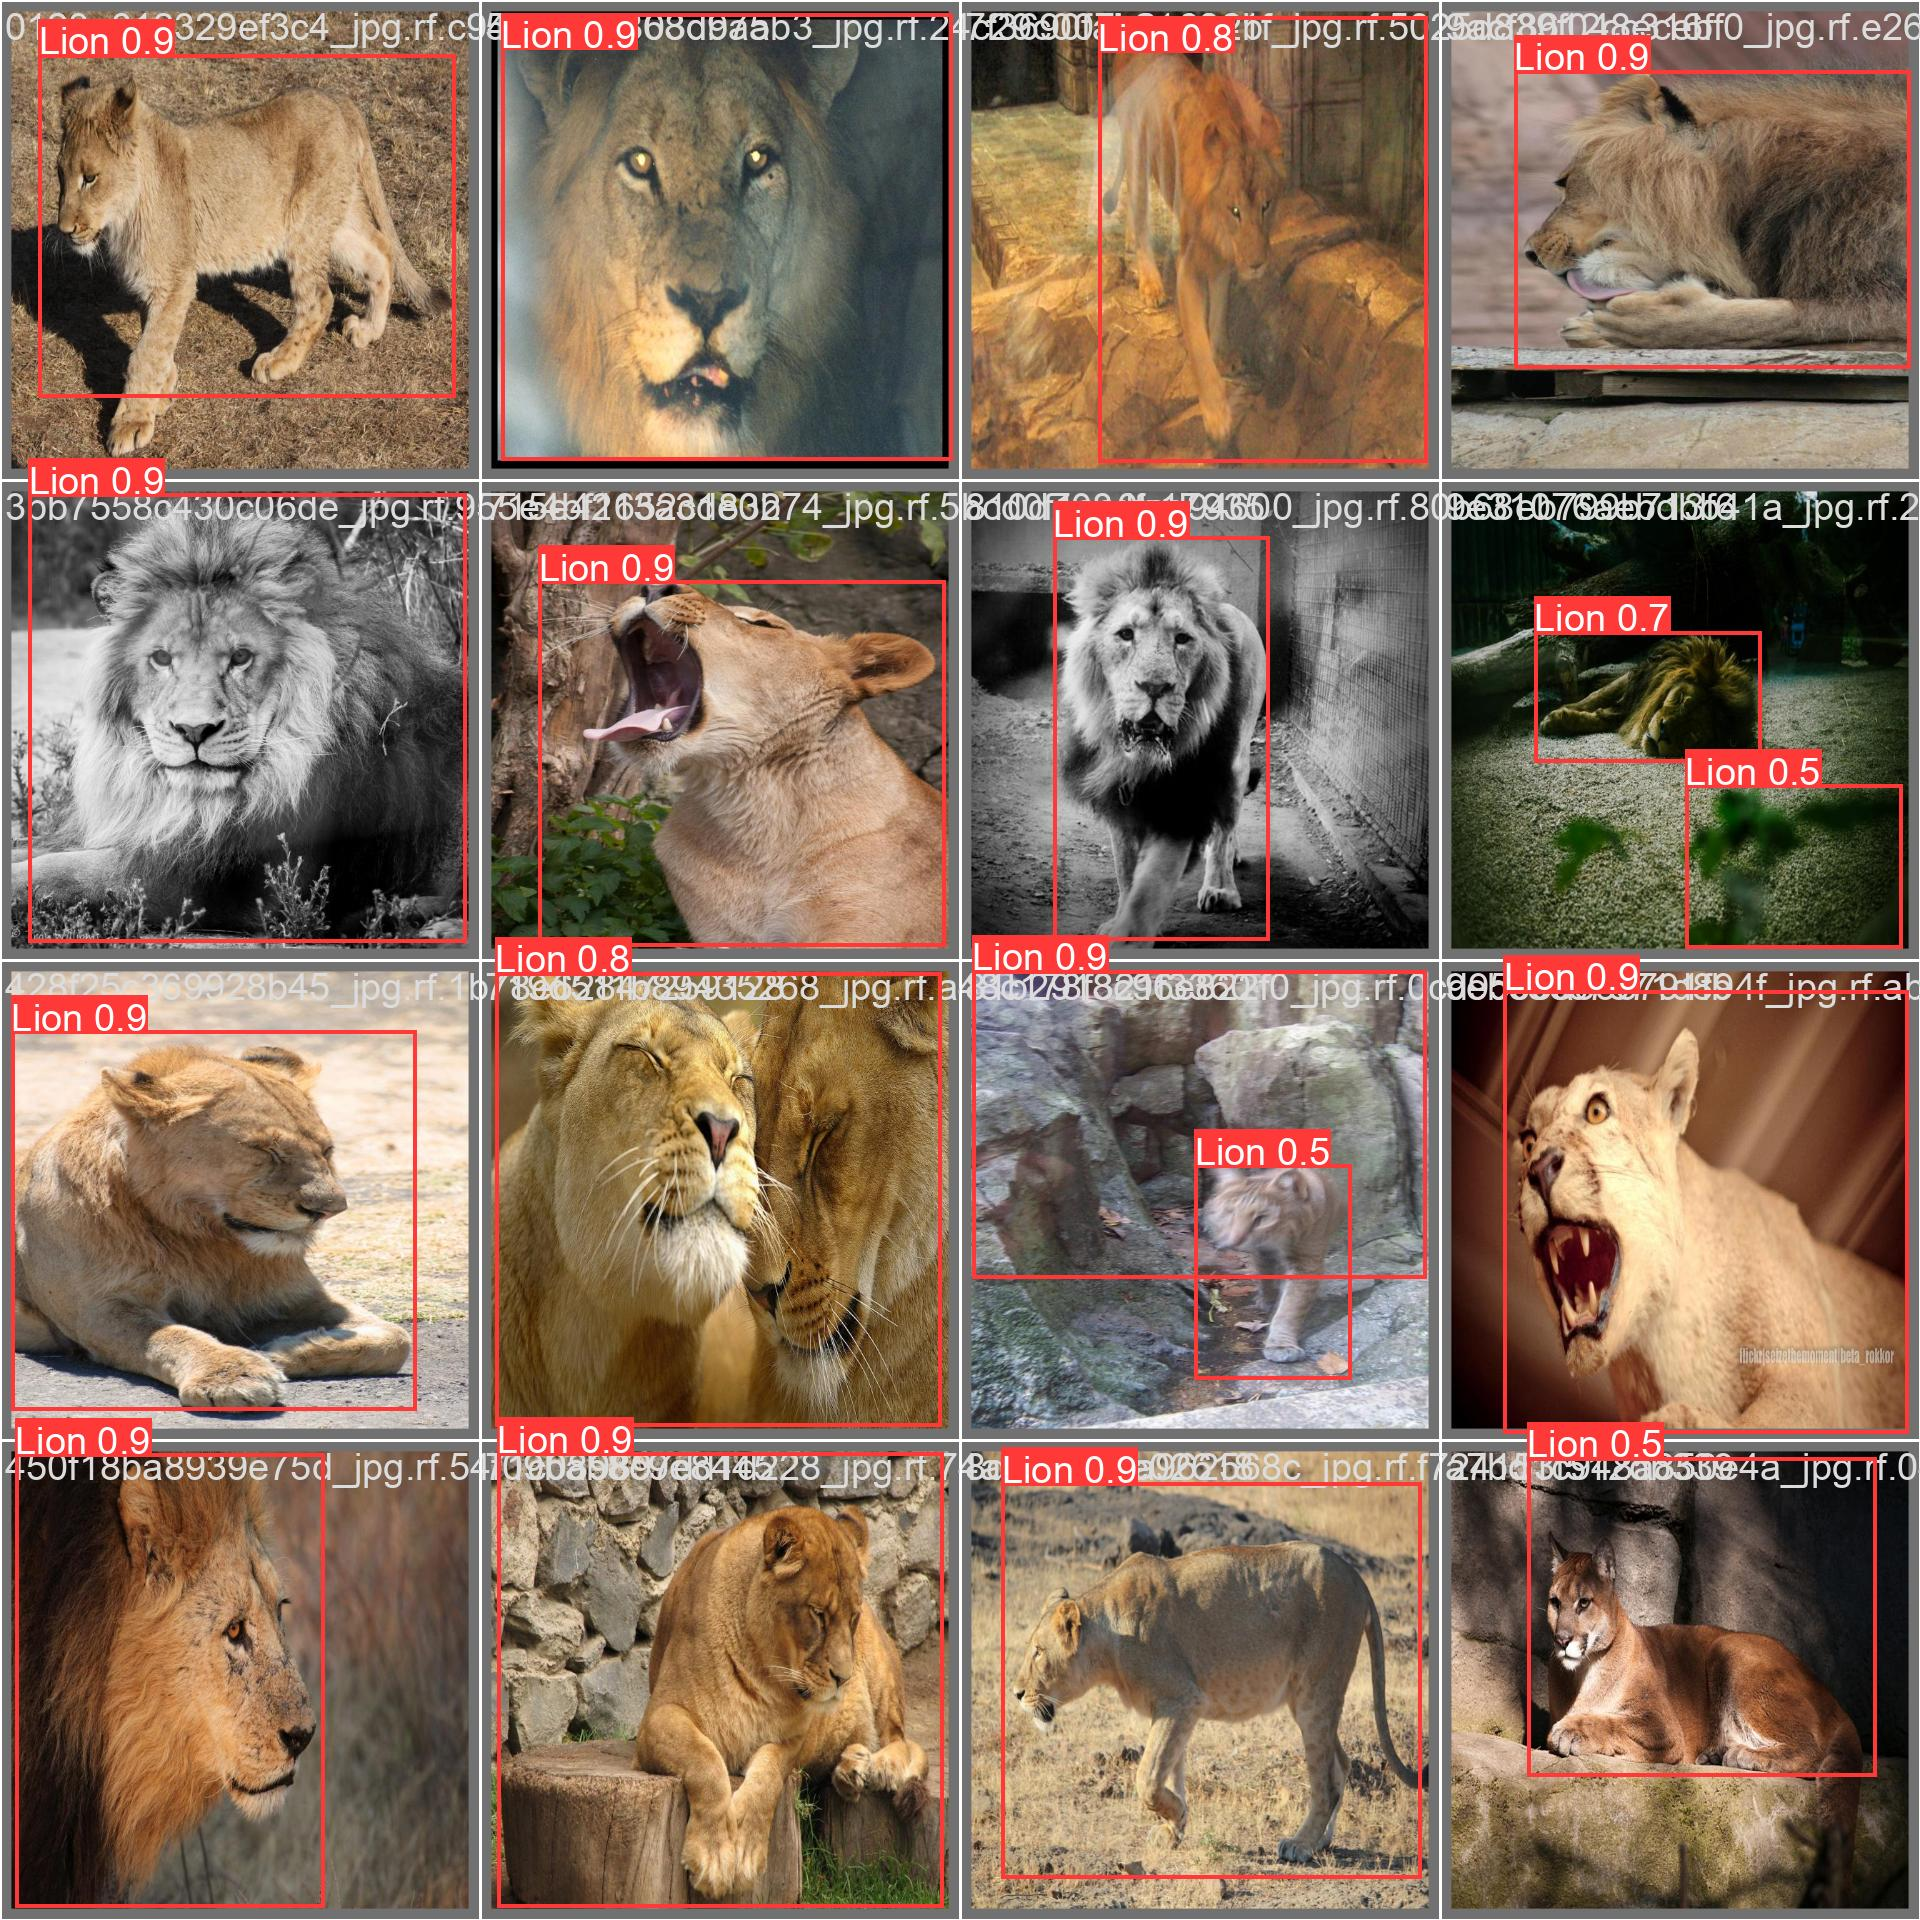

In [13]:
val_batch = cv2.imread('/content/runs/detect/train2/val_batch0_pred.jpg')

cv2_imshow(val_batch)

In [12]:
model.val('/content/my-datasets/data.yaml')

Ultralytics YOLOv8.0.159 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/my-datasets/valid/labels.cache... 61 images, 0 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]
                   all         61         63      0.947      0.889      0.914      0.681
Speed: 6.8ms preprocess, 14.6ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6f186828f0>
fitness: 0.7042313793264601
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.68097])
names: {0: 'Lion'}
plot: True
results_dict: {'metrics/precision(B)': 0.9471556028082938, 'metrics/recall(B)': 0.8888888888888888, 'metrics/mAP50(B)': 0.9136059407286027, 'metrics/mAP50-95(B)': 0.6809675391706664, 'fitness': 0.7042313793264601}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 6.837375828477203, 'inference': 14.599936907408669, 'loss': 0.001313256435706967, 'postprocess': 8.270029161797195}

In [14]:
results = model.predict(source='/content/my-datasets/test/images/')


image 1/31 /content/my-datasets/test/images/03a0ceb0342e6ef9_jpg.rf.8cf174580e0f2e3e46c176b62a34b559.jpg: 640x640 3 Lions, 9.9ms
image 2/31 /content/my-datasets/test/images/09d7d59a9e0698d3_jpg.rf.388ae15169376532069933847fa08998.jpg: 640x640 1 Lion, 10.0ms
image 3/31 /content/my-datasets/test/images/0abe5e4f09bc1262_jpg.rf.f0cb577d674ab9aba7f243883bf05992.jpg: 640x640 1 Lion, 9.9ms
image 4/31 /content/my-datasets/test/images/1e3814bddd5b608b_jpg.rf.6d44f8ee63af52d97c60d2d7fec20df8.jpg: 640x640 2 Lions, 9.8ms
image 5/31 /content/my-datasets/test/images/21b0a18099394d3f_jpg.rf.2a2d9a5e25524ffba81d90378cd9ef7c.jpg: 640x640 1 Lion, 22.5ms
image 6/31 /content/my-datasets/test/images/21dfe5721a39e647_jpg.rf.0e7a6505ba003b7089ffb93739623991.jpg: 640x640 1 Lion, 10.2ms
image 7/31 /content/my-datasets/test/images/25300e394f9aeea3_jpg.rf.32d241c3153f0d4a721454dab15913b4.jpg: 640x640 1 Lion, 10.3ms
image 8/31 /content/my-datasets/test/images/26216d42d11efe2f_jpg.rf.de8dfda6ea38114353da50e035db6

In [15]:
for i in range(len(results)):
  result = results[i]
  print(len(result.boxes))

  for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

3
Object type: Lion
Coordinates: [241, 86, 533, 307]
Probability: 0.94
---
Object type: Lion
Coordinates: [233, 406, 640, 640]
Probability: 0.71
---
Object type: Lion
Coordinates: [241, 403, 532, 640]
Probability: 0.27
---
1
Object type: Lion
Coordinates: [0, 134, 616, 639]
Probability: 0.84
---
1
Object type: Lion
Coordinates: [0, 0, 640, 640]
Probability: 0.94
---
2
Object type: Lion
Coordinates: [241, 43, 632, 571]
Probability: 0.51
---
Object type: Lion
Coordinates: [0, 52, 632, 587]
Probability: 0.41
---
1
Object type: Lion
Coordinates: [3, 87, 523, 640]
Probability: 0.52
---
1
Object type: Lion
Coordinates: [20, 16, 584, 640]
Probability: 0.84
---
1
Object type: Lion
Coordinates: [1, 120, 635, 614]
Probability: 0.92
---
6
Object type: Lion
Coordinates: [5, 283, 253, 558]
Probability: 0.82
---
Object type: Lion
Coordinates: [339, 360, 486, 526]
Probability: 0.73
---
Object type: Lion
Coordinates: [335, 357, 608, 524]
Probability: 0.6
---
Object type: Lion
Coordinates: [6, 367, 253